# BANK Case Study

##### xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# Context: 
### This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.


## Objective: 
### The classification goal is to predict the likelihood of a liability customer buying personal loans. 


## Plan of Action
#### Let's structure the things
* why we are solving this problem statement & what's the need of Bank?
* understanding the data, its size,checking null values ,do some EDA on it.
* Visualization of data to find some pattern into it.
* Solving the Use case specific problems & Handling the error, missing values.
* Splitting data into two parts Train & Test.
* Applying Logistic Model into it for Classification who will going to take Personal Loan or not.
* finding the Accuracy, Precision, Recall & ROC and AUC curve.
* give best model & explanation.

## Importing Important Packages

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [120]:
# Importing dataset
bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [121]:
# Reading Dataset
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [71]:
# Checking Shape
bank.shape

(5000, 14)

In [72]:
# Checking info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Data Wrangling

In [73]:
# Checking Null values in the data
bank.isnull().sum()                                      # Zero null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [74]:
# Summary Statistics
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# EDA

In [75]:
# Finding Unique
bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [76]:
# People with Zero mortgage
bank.loc[bank.Mortgage == 0, 'Mortgage'].value_counts()

0    3462
Name: Mortgage, dtype: int64

In [77]:
# people with zero Credit card spending per month
bank.loc[bank.CreditCard == 0, 'CreditCard'].value_counts()

0    3530
Name: CreditCard, dtype: int64

In [78]:
bank["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

#### 90% people are not taking Loans. 
### This is a highly imbalanced problem.

In [79]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [122]:
# Changing datatype
bank["Family"] = bank["Family"].astype(object)
bank["Securities Account"] = bank["Securities Account"].astype(object)
bank["CD Account"] = bank["CD Account"].astype(object)
bank["Online"] = bank["Online"].astype(object)
bank["CreditCard"] = bank["CreditCard"].astype(object)
bank["Education"] = bank["Education"].astype(object)

In [123]:
# Value Counts for all Categorical variable
for i in list(bank.columns[bank.dtypes=='object']):   # checking value counts of all object type columns
    print(bank[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



In [124]:
# removing unwanted column
bank.drop("ID", axis=1, inplace=True)

In [125]:
bank.drop("ZIP Code", axis=1, inplace=True)
bank.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0


In [126]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null object
CCAvg                 5000 non-null float64
Education             5000 non-null object
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null object
CD Account            5000 non-null object
Online                5000 non-null object
CreditCard            5000 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 468.9+ KB


### Univariate Analysis

F:\anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


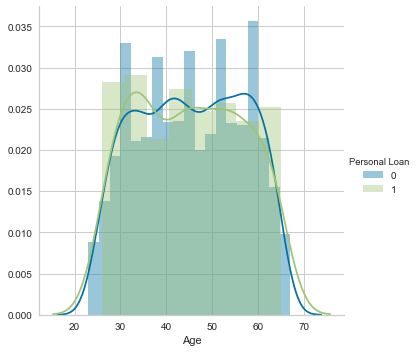

In [127]:
sns.FacetGrid(bank, hue="Personal Loan", size=5).map(sns.distplot, "Age").add_legend()

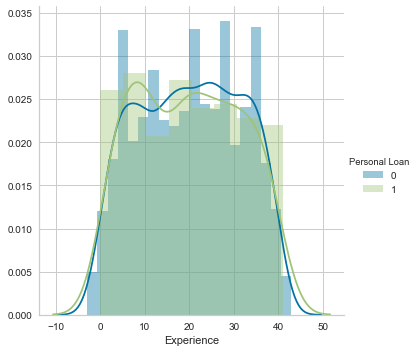

In [128]:
sns.FacetGrid(bank, hue="Personal Loan", size=5).map(sns.distplot, "Experience").add_legend()

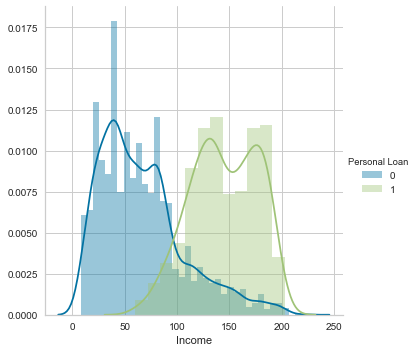

In [129]:
sns.FacetGrid(bank, hue="Personal Loan", size=5).map(sns.distplot, "Income").add_legend()

#### People whose income is in between  dollar (100  to  200) are buying Personal Loan but people having low income in between 10 to 50 dollar are not taking Personal Loans.

In [130]:
# Replacing (1,2,3)in Education to the corresponding values ("UnderGrad","Graduate","Advanced/Professional")
data = bank
data["Education"] = data["Education"].replace(to_replace=[1,2,3], value=["UnderGrad","Graduate","Advanced/Professional"])
data.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,UnderGrad,0,0,1,0,0,0
1,45,19,34,3,1.5,UnderGrad,0,0,1,0,0,0


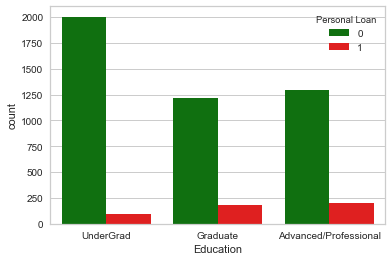

In [131]:
# Using Countplot
# create  dictionary mapping subgroup values to colors 
pallete_colors = {0 : "green", 1:"red"}

sns.countplot(x="Education", hue="Personal Loan", data=data, palette = pallete_colors)


## Bivariate Analysis

In [132]:
# Drawing a relationship between Age, Education & Personal Loan
bank.groupby(["Personal Loan","Age"])["Education"].value_counts()

Personal Loan  Age  Education            
0              23   UnderGrad                 7
                    Graduate                  5
               24   UnderGrad                13
                    Graduate                  8
                    Advanced/Professional     7
                                             ..
1              64   Graduate                  3
                    UnderGrad                 2
               65   Graduate                  6
                    UnderGrad                 5
                    Advanced/Professional     3
Name: Education, Length: 249, dtype: int64

In [133]:
bank.groupby(["Personal Loan","CreditCard"])["Age"].value_counts()

Personal Loan  CreditCard  Age
0              0           43     106
                           35     100
                           58      95
                           39      94
                           40      93
                                 ... 
1              1           64       2
                           48       1
                           51       1
                           57       1
                           63       1
Name: Age, Length: 170, dtype: int64

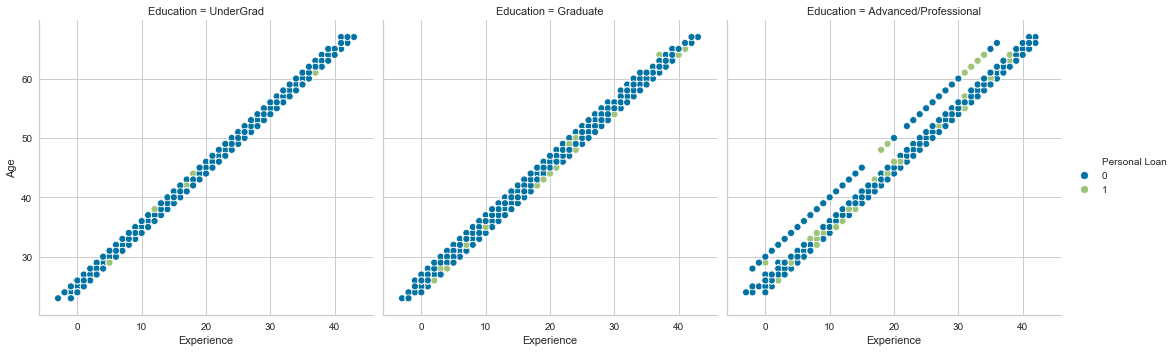

In [134]:
# Change to make subplots
sns.relplot(x = 'Experience', y = 'Age', data = bank , kind = 'scatter', hue = "Personal Loan", col="Education")

#### here we can see the positive correlation between Age & Experience.But very few people who are taking Personal Loans who are UnderGrad, & the people who are Advanced / Professional are taking Personal Loans more than others.

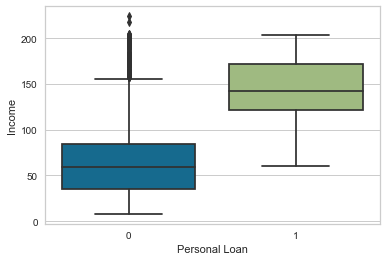

In [135]:
sns.boxplot(x="Personal Loan", y="Income", data=data)

#### In the above graph, we found an insight that Persons having higher income but bank cannot give them Personal Loan.

In [136]:
# Using Groupby method on Target variable
bank.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.132301,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


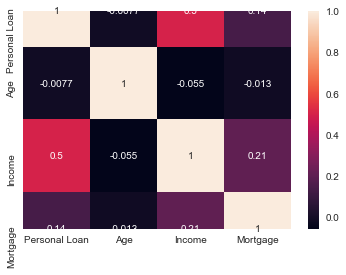

In [137]:
# Checking Correlation between Dependent & Independent 
sns.heatmap(bank[["Personal Loan","Age","Income","Mortgage", "Education"]].corr(), annot=True)

## Here we can see the max difference between Income , CCAvg and Mortgage values of Personal loan.
+ So the customers having higher income spending more on credit cards and house mortgages.

# Model building using Logistic Regression
+ using Sklearn library to build the model.

## Logistic Regression :  In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

### Logistic Regression Assumptions:
+ Binary logistic regression requires the dependent variable to be binary.
+ For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
+ Only the meaningful variables should be included.
+ The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
+ The independent variables are linearly related to the log odds.
+ Logistic regression requires quite large sample sizes.

In [138]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null object
CCAvg                 5000 non-null float64
Education             5000 non-null object
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null object
CD Account            5000 non-null object
Online                5000 non-null object
CreditCard            5000 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 468.9+ KB


In [139]:
# Define dependent & Independent variables
X = bank.drop('Personal Loan', axis=1)
y = bank['Personal Loan']

In [140]:
# Creating dummy for categorical variable
X = pd.get_dummies(X, drop_first=True)

In [141]:
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

In [142]:
# Split data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [143]:
logmodel = LogisticRegression()

In [144]:
logmodel.fit(X_train, y_train)

F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
predictions = logmodel.predict(X_test)

In [146]:
from sklearn.metrics import classification_report

In [147]:
c=classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1343
           1       0.92      0.72      0.81       157

    accuracy                           0.96      1500
   macro avg       0.94      0.86      0.89      1500
weighted avg       0.96      0.96      0.96      1500



In [148]:
from sklearn.metrics import confusion_matrix

In [149]:
confusion_matrix(y_test,predictions)

array([[1333,   10],
       [  44,  113]], dtype=int64)

In [150]:
## function to get confusion matrix in a proper format
import seaborn as sns
import matplotlib.pyplot as plt
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.xlabel('Predicted')
    plt.ylabel('Observed')
    plt.show()

Trainig accuracy 0.9582857142857143

Testing accuracy 0.964

Confusion Matrix


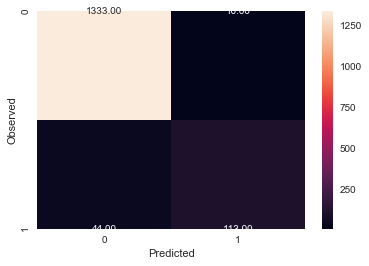

None

Recall: 0.7197452229299363

Precision: 0.9186991869918699

F1 Score: 0.8071428571428572

Roc Auc Score: 0.8561496032743502


In [151]:
print("Trainig accuracy",logmodel.score(X_train,y_train))  
print()
print("Testing accuracy",logmodel.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,predictions))
print()
print("Recall:",recall_score(y_test,predictions))
print()
print("Precision:",precision_score(y_test,predictions))
print()
print("F1 Score:",f1_score(y_test,predictions))
print()
print("Roc Auc Score:",roc_auc_score(y_test,predictions))

# Over-Sampling

In [152]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification

In [153]:
print('Original dataset shape %s' % Counter(y))
random_state = 42
rus = RandomOverSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4520, 1: 480})
Resampled dataset shape Counter({0: 4520, 1: 4520})


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
y_pred = logreg.predict(X_test)

In [156]:
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1383
           1       0.90      0.90      0.90      1329

    accuracy                           0.90      2712
   macro avg       0.90      0.90      0.90      2712
weighted avg       0.90      0.90      0.90      2712



# UNDERSAMPLING     ##########################

In [157]:
from imblearn.under_sampling import RandomUnderSampler
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4520, 1: 480})
Resampled dataset shape Counter({0: 480, 1: 480})


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
y_pred = logreg.predict(X_test)

In [160]:
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       143
           1       0.87      0.90      0.89       145

    accuracy                           0.88       288
   macro avg       0.88      0.88      0.88       288
weighted avg       0.88      0.88      0.88       288



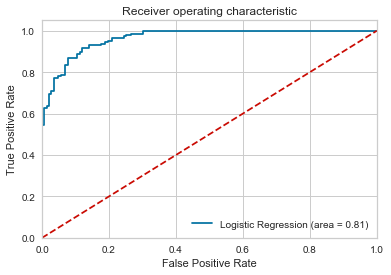

In [161]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [162]:
# Checking Parameters of logistic regression
logmodel.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [163]:
import warnings

In [164]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.908, 0.915, 0.914, 0.874, 0.865]

[0.882, 0.882, 0.892, 0.861, 0.858]


F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
F:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [165]:
model = LogisticRegression(random_state=42,penalty='l2', solver= "liblinear") 

model.fit(X_train, y_train)

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))   

Trainig accuracy 0.9107142857142857

Testing accuracy 0.8888888888888888


In [167]:
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', class_weight='balanced', C=i, solver="liblinear")  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.878, 0.891, 0.903, 0.912, 0.914, 0.911]

[0.872, 0.875, 0.878, 0.892, 0.892, 0.892]


Trainig accuracy 0.9136904761904762

Testing accuracy 0.8923611111111112

Confusion Matrix


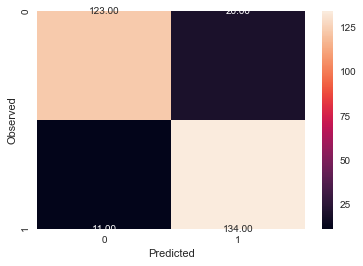

None

Recall: 0.9241379310344827

Precision: 0.8701298701298701

F1 Score: 0.8963210702341137

Roc Auc Score: 0.8921388955871714


In [168]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2', class_weight='balanced',C=0.75, solver="liblinear") 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [58]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


F:\anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


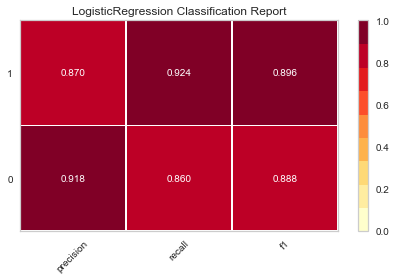

F:\anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


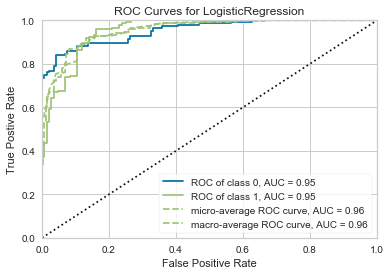

In [169]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Business Insights
#### Confusion Matrix
*True Positive (observed=1,predicted=1):*

Predicted that Personal loan will be taken and the customer was eligibile for purchasing Personal loan.

*False Positive (observed=0,predicted=1):*

Predicted that Personal loan will be granted but the customer was not eligibile for taking Personal loan.

*True Negative (observed=0,predicted=0):*

Predicted that Personal loan will not be granted and the customer was not eligibile for taking Personal loan.

*False Negative (observed=1,predicted=0):*

Predicted that Personal loan will not be granted and the customer was eligibile for taking personal loan.

Here the Customers wants to take Personal loan from the bank who are eligible i.e. less number of False Negative, if FN is high then bank would lose its customers. So that, the bank doesn't lose coustomers who are  eligible for the Personal loan. Hence, Recall is the important metric.

After achieving the desired accuracy(train = 91%, test = 89%), we can deploy the model for practical use in Bank to predict which customer will buy Personal Loan or Not. 